In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, matthews_corrcoef, classification_report, balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score

import warnings
warnings.filterwarnings("ignore")


In [164]:
df_ = pd.read_csv('Wine_Quality_Data.csv')
df_.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [165]:
#check the number of rows and columns
df_.shape

(6497, 13)

In [166]:
#check for null values
df_.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [167]:
df_.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


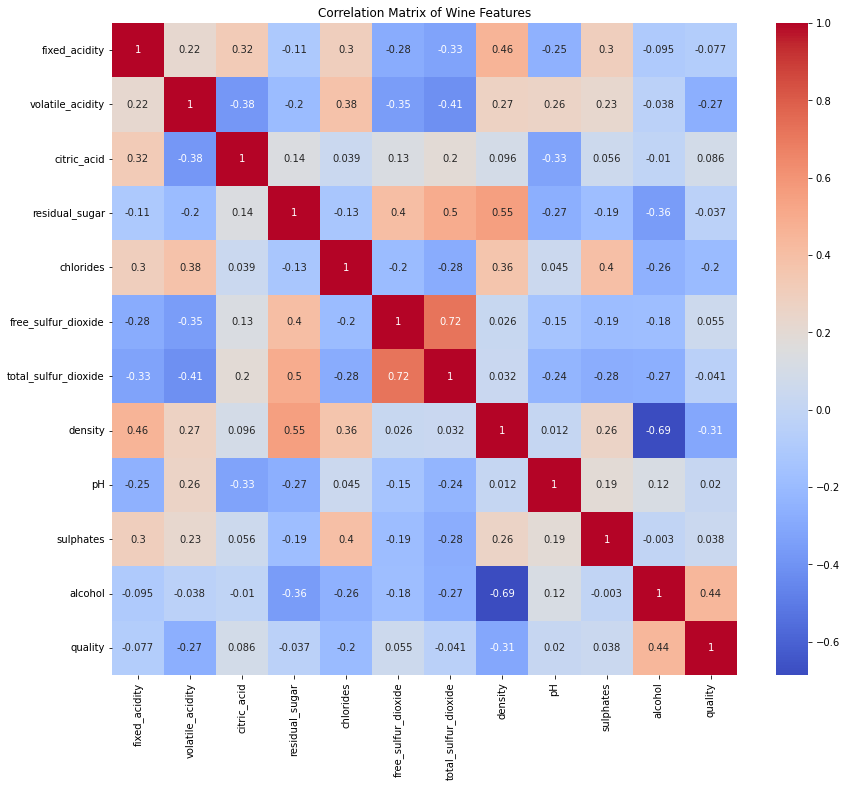

In [168]:
#corr matrix to understand relationships between different features
plt.figure(figsize=(14,12))
sns.heatmap(df_.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wine Features')
plt.show()


In [169]:
# count the number of occurences for white (0) and red (1) values
counts = df_['color'].value_counts()

print(counts)

white    4898
red      1599
Name: color, dtype: int64


In [170]:
# one-hot encode the categorical value (color)
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df_[['color']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['color']))
df = pd.concat([df_, encoded_df], axis=1)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,color_red,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


In [171]:
del df['color']

In [172]:
#check the instances of color==white with before
df['color_white'].sum()

4898.0

In [173]:
#check the instances of color==red with before
df['color_red'].sum()

1599.0

In [174]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0


In [175]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color_red               float64
color_white             float64
dtype: object

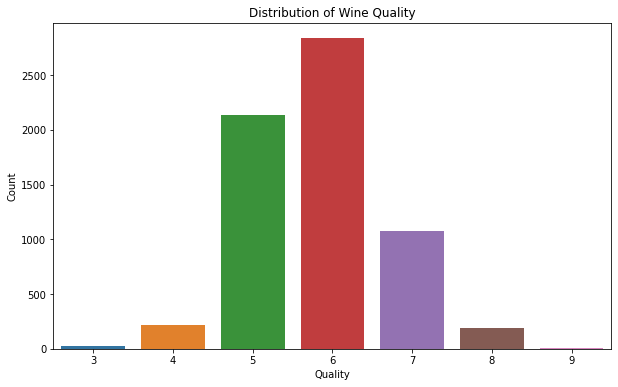

In [176]:
#plotting the distribution of target variable
plt.figure(figsize=(10,6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [177]:
#we can see that there is class imbalance, with the most number of instances being wine quality score 6.
#we looked for instances of each quality score (3-9) to check for class imbalance
quality_counts = df['quality'].value_counts().sort_index()
print("the number of instances for each quality score:\n")
print(quality_counts)

the number of instances for each quality score:

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64


Class Proportions (%):

3     0.461752
4     3.324611
5    32.907496
6    43.650916
7    16.607665
8     2.970602
9     0.076959
Name: quality, dtype: float64


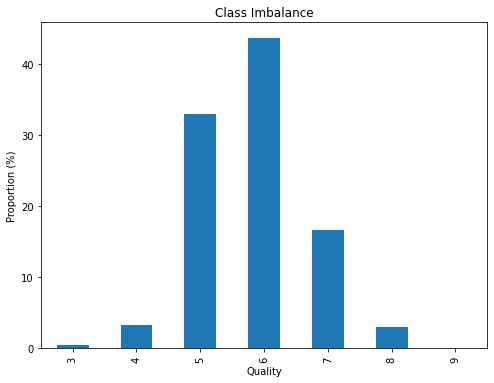

In [178]:
#calculate class proportions
quality_proportions = quality_counts / len(df) * 100

print("Class Proportions (%):\n")
print(quality_proportions)

# class imbalance
plt.figure(figsize=(8, 6))
quality_proportions.plot(kind='bar')
plt.title('Class Imbalance')
plt.xlabel('Quality')
plt.ylabel('Proportion (%)')
plt.show()

In [179]:
X = df.drop('quality', axis=1)
X.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
color_red               0
color_white             0
dtype: int64

In [180]:
y = df['quality']
#y = y-min(y) #in order to start from 0 not 3 
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#we applied SMOTE to oversample the minority classes
smote = SMOTE(random_state= 42, k_neighbors=3)
X_train, y_train = smote.fit_resample(X_train, y_train)

#class distribution after SMOTE
print("Class Proportions after SMOTE:")
print(y_train.value_counts().sort_index())

Class Proportions after SMOTE:
3    2239
4    2239
5    2239
6    2239
7    2239
8    2239
9    2239
Name: quality, dtype: int64


In [181]:
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
df_resampled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color_red,color_white,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0,0.0,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,0.0,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,0.0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,0.0,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0,0.0,2


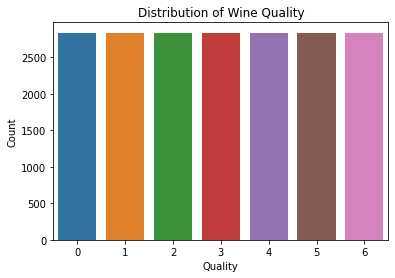

In [182]:
#plotting the distribution of target variable after SMOTE
plt.figure()
sns.countplot(x='quality', data=df_resampled)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [183]:
X_resampled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color_red,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0,0.0


In [184]:
# we scaled the numeric column with StandardScaler
numeric_features = X_resampled.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
#we defined columntransformer object
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])



In [185]:
X_resampled.lt(0).any().any()

False

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)


Classifier: SVC
model score: 0.704
Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1991
           1       0.74      0.80      0.77      1976
           2       0.63      0.61      0.62      1986
           3       0.54      0.39      0.46      1976
           4       0.57      0.56      0.57      1973
           5       0.67      0.80      0.73      1973
           6       1.00      1.00      1.00      2021

    accuracy                           0.73     13896
   macro avg       0.72      0.73      0.73     13896
weighted avg       0.73      0.73      0.73     13896

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       845
           1       0.71      0.76      0.74       860
           2       0.57      0.56      0.57       850
           3       0.47      0.35      0.40       860
           4       0.56 

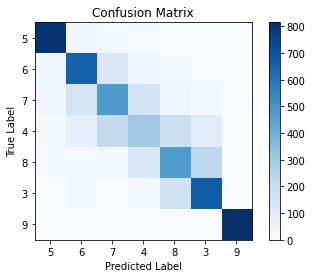


Classifier: RandomForestClassifier
model score: 0.774
Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1991
           1       0.82      0.89      0.85      1976
           2       0.70      0.73      0.71      1986
           3       0.72      0.58      0.64      1976
           4       0.82      0.82      0.82      1973
           5       0.90      0.94      0.92      1973
           6       0.99      1.00      0.99      2021

    accuracy                           0.85     13896
   macro avg       0.84      0.85      0.84     13896
weighted avg       0.85      0.85      0.84     13896

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       845
           1       0.76      0.84      0.80       860
           2       0.60      0.64      0.62       850
           3       0.53      0.38      0.44       860
     

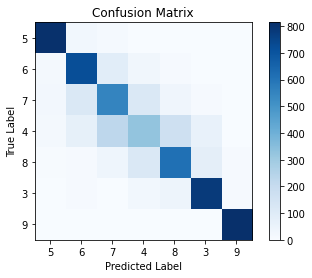


Classifier: XGBClassifier
model score: 0.826
Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1991
           1       0.93      0.98      0.95      1976
           2       0.85      0.84      0.85      1986
           3       0.86      0.74      0.80      1976
           4       0.87      0.90      0.89      1973
           5       0.94      0.98      0.96      1973
           6       1.00      1.00      1.00      2021

    accuracy                           0.92     13896
   macro avg       0.92      0.92      0.92     13896
weighted avg       0.92      0.92      0.92     13896

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       845
           1       0.86      0.91      0.88       860
           2       0.69      0.70      0.69       850
           3       0.65      0.50      0.57       860
           4  

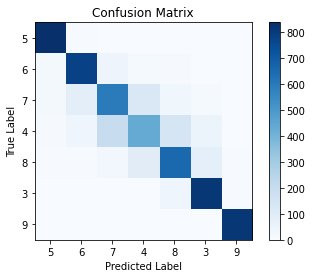

In [187]:
preprocessor.fit(X_train)

# we deinfed the classifiers
svm_clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier', SVC(kernel = 'rbf'))])

rf_clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=100))])

xgb_clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier', XGBClassifier(eval_metric='mlogloss', max_depth=6, alpha=1, learning_rate=0.1))])

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

#we train and evaluate models
for clf in [svm_clf, rf_clf, xgb_clf]:
    clf.fit(X_train, y_train)
    print("\nClassifier: " + clf.named_steps['classifier'].__class__.__name__)
    print("model score: %.3f" % clf.score(X_test, y_test))
    
    #get classification report for train set
    y_train_pred = clf.predict(X_train)
    train_report = classification_report(y_train, y_train_pred)
    print("Classification Report - Training Set:")
    print(train_report)

    #get classification report for test set
    y_test_pred = clf.predict(X_test)
    test_report = classification_report(y_test, y_test_pred)
    print("Classification Report - Test Set:")
    print(test_report)
    
    #define the list of class labels
    classes = df['quality'].unique()
    
    plot_confusion_matrix(y_test,y_test_pred, classes)
    


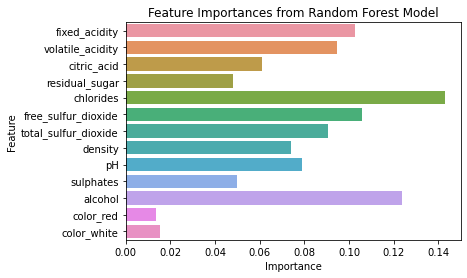

In [188]:
#we find feature importance from the Random Forest model:
rf_clf.fit(X_train, y_train)
#we get the feature importances of the model
importances = rf_clf.named_steps['classifier'].feature_importances_


# We have done mapping to match feature importances to the corresponding feature names
feature_names = list(numeric_features) + preprocessor.named_transformers_['num'].named_steps['scaler'].get_feature_names_out().tolist()
feature_importances = dict(zip(feature_names, importances))

plt.figure()
sns.barplot(x=list(feature_importances.values()), y=list(feature_importances.keys()))
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


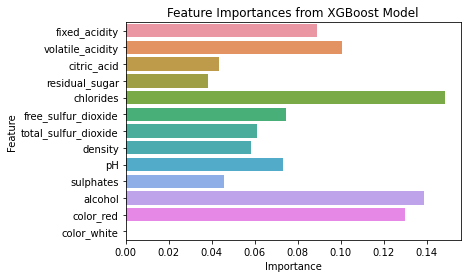

In [189]:
#we find feature importance from the xgboost model:
xgb_clf.fit(X_train, y_train)
#we get the feature importances of the model
importances = xgb_clf.named_steps['classifier'].feature_importances_


# We have done mapping to match feature importances to the corresponding feature names
feature_names = list(numeric_features) + preprocessor.named_transformers_['num'].named_steps['scaler'].get_feature_names_out().tolist()
feature_importances = dict(zip(feature_names, importances))

plt.figure()
sns.barplot(x=list(feature_importances.values()), y=list(feature_importances.keys()))
plt.title('Feature Importances from XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [190]:
svm_clf.fit(X_train, y_train)

#we check if the kernel is linear, as we cannot do feature importance on SVMs with non-linear kernels
if svm_clf.named_steps['classifier'].kernel == 'linear':
    importances = np.abs(svm_clf.named_steps['classifier'].coef_[0])

    # We have done mapping to match feature importances to the corresponding feature names
    feature_names = list(numeric_features) + preprocessor.named_transformers_['num'].named_steps['scaler'].get_feature_names_out().tolist()
    feature_importances = dict(zip(feature_names, importances))

    plt.figure()
    sns.barplot(x=list(feature_importances.values()), y=list(feature_importances.keys()))
    plt.title('Feature Importances from Linear SVM Model')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

else:
    print("Feature importances aren't well defined for non-linear SVMs")


Feature importances aren't well defined for non-linear SVMs


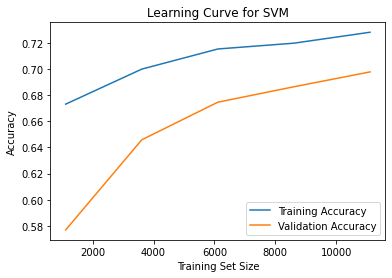

In [191]:
from sklearn.model_selection import learning_curve
from sklearn.inspection import permutation_importance

svm_clf.fit(X_train, y_train)

train_sizes, train_scores, val_scores = learning_curve(svm_clf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='accuracy')
mean_train_scores = np.mean(train_scores, axis=1)
mean_val_scores = np.mean(val_scores, axis=1)

plt.figure()
plt.plot(train_sizes, mean_train_scores, label='Training Accuracy')
plt.plot(train_sizes, mean_val_scores, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for SVM')
plt.legend()
plt.show()

#model performs better as training set increases


Classifier: Random Forest


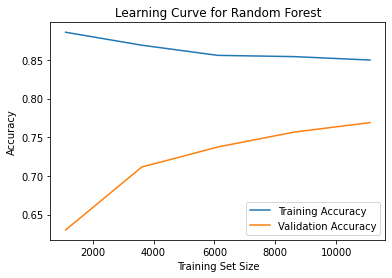

In [192]:
rf_clf.fit(X_train, y_train)
print("\nClassifier: Random Forest")

train_sizes, train_scores, val_scores = learning_curve(rf_clf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='accuracy')
mean_train_scores = np.mean(train_scores, axis=1)
mean_val_scores = np.mean(val_scores, axis=1)


plt.figure()
plt.plot(train_sizes, mean_train_scores, label='Training Accuracy')
plt.plot(train_sizes, mean_val_scores, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Random Forest')
plt.legend()
plt.show()

#model initially performs well, as training set increases performance decreases.


Classifier: XGBoost


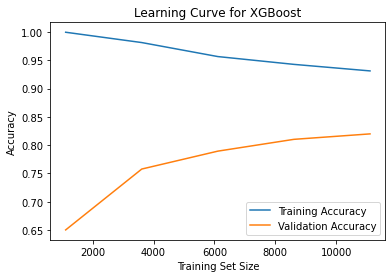

In [193]:
xgb_clf.fit(X_train, y_train)
print("\nClassifier: XGBoost")

train_sizes, train_scores, val_scores = learning_curve(xgb_clf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='accuracy')
mean_train_scores = np.mean(train_scores, axis=1)
mean_val_scores = np.mean(val_scores, axis=1)

plt.figure()
plt.plot(train_sizes, mean_train_scores, label='Training Accuracy')
plt.plot(train_sizes, mean_val_scores, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for XGBoost')
plt.legend()
plt.show()

#model initially performs well, as training set increases performance decreases.

In [194]:
# using 5-fold cross validation for SVM
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(svm_clf, X, y, cv=cv, scoring='accuracy')
print("Cross-Validation Results for SVM:")
print("Accuracy: %.3f" % scores.mean())

Cross-Validation Results for SVM:
Accuracy: 0.572


In [195]:
# using 5-fold cross validation for random forest
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(rf_clf, X, y, cv=cv, scoring='accuracy')

print("Cross-Validation Results for Random Forest:")
print("Accuracy: %.3f" % scores.mean())

Cross-Validation Results for Random Forest:
Accuracy: 0.618


In [196]:
# using 5-fold cross validation for xgboost
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(xgb_clf, X, y, cv=cv, scoring='accuracy')

print("Cross-Validation Results for XGBoost:")
print("Accuracy: %.3f" % scores.mean())

Cross-Validation Results for XGBoost:
Accuracy: 0.645
